In [1]:
from intercode import Intercode

import scvi as scv
import scanpy as sc
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7, 7)
mpl.rcParams['figure.dpi'] = 100

### Load and preprocess data

In [3]:
# preprocessed Kang18 dataset (log transformed, highly variable genes) 
# with reactome annotations in adata.varm['I']
# download dataset - https://drive.google.com/file/d/1BWdDg4mW0wSvZxDFMh0EcG-gLGQ5PllN/view?usp=sharing
adata = sc.read('kang_count_proc.h5ad')

In [3]:
select_genes = adata.varm['I'].sum(1)>0
adata._inplace_subset_var(select_genes)
adata.X-=adata.X.mean(0)

### Get intercode latent representation

In [4]:
LR = 0.001
BATCH_SIZE = 62
N_EPOCHS = 80

# regularization hyperparameters
# lambda0 - page 19 of presentation
# lambdas 1-3 - last term on page 20

LAMBDA0 = 0.1

LAMBDA1 = 0.93
LAMBDA3 = 0.57

In [5]:
intercode = Intercode(adata)
# n_sparse - number of sparse terms, corresponding l1 regularization hyperparameter - lambda2
# n_dense - number of dense terms

In [6]:
intercode.train(LR, BATCH_SIZE, N_EPOCHS, l2_reg_lambda0=LAMBDA0, lambda1=LAMBDA1, lambda3=LAMBDA3)

Sending the whole dataset to cuda
Epoch: 0 | batch train loss: 375.2281
Epoch: 0 | batch train loss: 63.2514
Epoch: 0 | batch train loss: 61.4853
Epoch: 0 -- total train loss:  62.8793=58.1525+4.7268
Number of deactivated terms: 0
Share of deactivated inactive genes: 0.9535
Epoch: 1 | batch train loss: 68.7220
Epoch: 1 | batch train loss: 66.2366
Epoch: 1 | batch train loss: 67.4692
Epoch: 1 -- total train loss:  56.3138=51.6344+4.6794
Number of deactivated terms: 6
Share of deactivated inactive genes: 0.9780
Epoch: 2 | batch train loss: 62.1251
Epoch: 2 | batch train loss: 60.1199
Epoch: 2 | batch train loss: 63.6342
Epoch: 2 -- total train loss:  52.3494=47.8022+4.5472
Number of deactivated terms: 24
Share of deactivated inactive genes: 0.9835
Epoch: 3 | batch train loss: 62.8789
Epoch: 3 | batch train loss: 56.7606
Epoch: 3 | batch train loss: 52.5793
Epoch: 3 -- total train loss:  49.5538=44.7135+4.8403
Number of deactivated terms: 32
Share of deactivated inactive genes: 0.9846
Epo

Share of deactivated inactive genes: 0.9548
Epoch: 67 | batch train loss: 46.7170
Epoch: 67 | batch train loss: 39.5507
Epoch: 67 | batch train loss: 37.6790
Epoch: 67 -- total train loss:  37.1730=34.9664+2.2065
Number of deactivated terms: 26
Share of deactivated inactive genes: 0.9385
Epoch: 68 | batch train loss: 37.9835
Epoch: 68 | batch train loss: 40.1860
Epoch: 68 | batch train loss: 41.8065
Epoch: 68 -- total train loss:  37.0819=34.7883+2.2936
Number of deactivated terms: 11
Share of deactivated inactive genes: 0.9197
Epoch: 69 | batch train loss: 39.8092
Epoch: 69 | batch train loss: 38.6984
Epoch: 69 | batch train loss: 42.9255
Epoch: 69 -- total train loss:  37.0144=34.7041+2.3104
Number of deactivated terms: 8
Share of deactivated inactive genes: 0.9459
Epoch: 70 | batch train loss: 40.5974
Epoch: 70 | batch train loss: 41.7164
Epoch: 70 | batch train loss: 49.6911
Epoch: 70 -- total train loss:  37.1386=34.8703+2.2684
Number of deactivated terms: 5
Share of deactivated i

In [7]:
def select_terms(first, second):
    f = np.where(adata.uns['terms']==first)[0][0]
    s = np.where(adata.uns['terms']==second)[0][0]
    return f, s

In [8]:
terms = select_terms('INTERFERON_SIGNALING', 'SIGNALING_BY_THE_B_CELL_RECEPT')

In [9]:
encoded = intercode.encode(adata.X)
vars_latent = encoded[:, terms].data.cpu().numpy()

In [10]:
adata.obs['INTERFERON_SIGNALING'] = vars_latent[:, 0]
adata.obs['SIGNALING_BY_THE_B_CELL_RECEPT'] = vars_latent[:, 1]

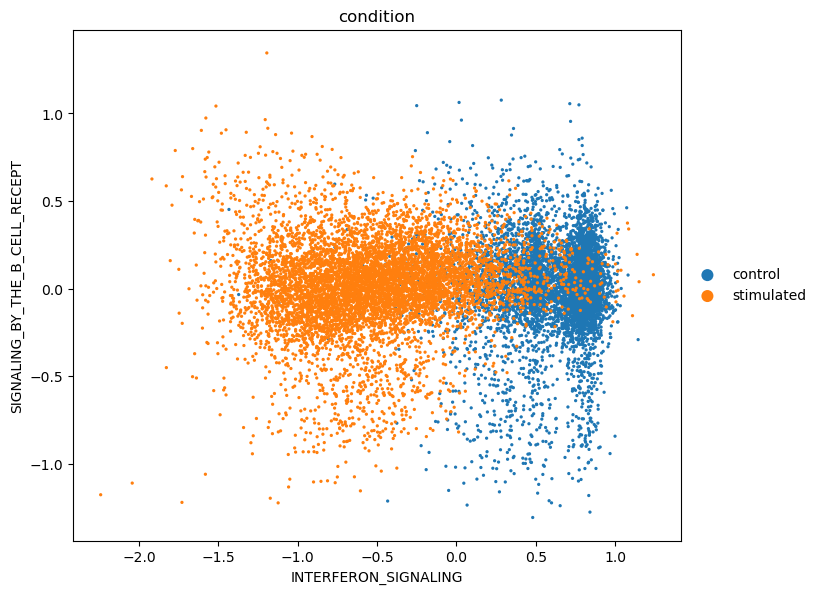

In [11]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='condition', size=22)

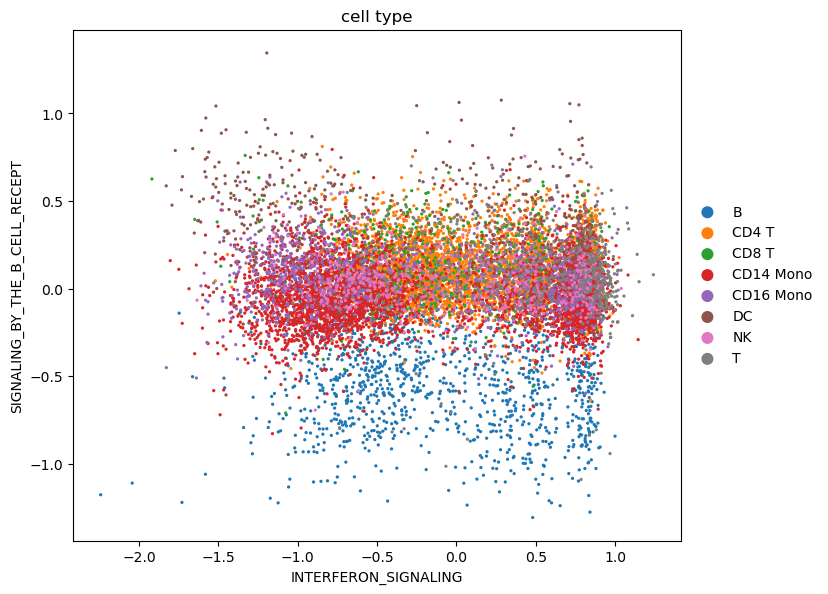

In [12]:
sc.pl.scatter(adata, x='INTERFERON_SIGNALING', y='SIGNALING_BY_THE_B_CELL_RECEPT', color='cell_type', size=22)